# Восстановление золота из руды

### Описание проекта

Нужно подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Нужно использовать данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.dummy import DummyRegressor

In [2]:
STATE = 12345

In [3]:
train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [4]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
full_df.info()
full_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
# Сравним размеры датасетов
print(train_df.shape)
print(test_df.shape)
print(full_df.shape)

(14149, 87)
(5290, 53)
(19439, 87)


В test_df гораздо меньше данных, чем в train_df и full_df. Для обучения модели train_df надо подогнать под test_df по количеству данных. 

In [8]:
# Приведем тип столбца date к правильному во всех датасетах 
train_df['date'] = pd.to_datetime(train_df['date'], format='%Y-%m-%dT%H:%M:%S')
test_df['date'] = pd.to_datetime(test_df['date'], format='%Y-%m-%dT%H:%M:%S')
full_df['date'] = pd.to_datetime(full_df['date'], format='%Y-%m-%dT%H:%M:%S')

In [9]:
# Посмотрим на пропуски в датасетах
train_df.isna().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
                                            ... 
rougher.output.concentrate_pb                  0
rougher.output.concentrate_au                  0
rougher.output.recovery                        0
rougher.output.tail_pb                         0
date                                           0
Length: 87, dtype: int64

In [10]:
test_df.isna().sum().sort_values(ascending=False).head(13)

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_a_air       3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank2_b_level     0
dtype: int64

In [11]:
full_df.isna().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
                                            ... 
rougher.state.floatbank10_d_level              0
rougher.state.floatbank10_d_air                0
rougher.output.tail_pb                         0
rougher.output.tail_sol                        0
date                                           0
Length: 87, dtype: int64

Пропуски в датасете full_df не особо нас интересуют, а вот пропуски в test_df и train_df придется заполнить. Здесь оптимален будет метод заполнения пропусков ffill, который заполняет пропуски на основе заполненных ранее данных. 

In [12]:
train_df = pd.merge(train_df['date'],
                    train_df.drop(columns='date').fillna(method='ffill'), 
                    how='left', left_index=True, right_index=True)

In [13]:
test_df = pd.merge(test_df['date'],
                    test_df.drop(columns='date').fillna(method='ffill'), 
                    how='left', left_index=True, right_index=True)

In [14]:
# Посмотрим на корреляцию между признаками
corr = train_df.corr()
corr[(corr > 0.8) & (corr < 0.9999)].unstack().dropna().sort_values(ascending=False)

rougher.state.floatbank10_e_level         rougher.state.floatbank10_f_level           0.988426
rougher.state.floatbank10_f_level         rougher.state.floatbank10_e_level           0.988426
rougher.state.floatbank10_b_level         rougher.state.floatbank10_c_level           0.988065
rougher.state.floatbank10_c_level         rougher.state.floatbank10_b_level           0.988065
                                          rougher.state.floatbank10_d_level           0.987670
                                                                                        ...   
rougher.state.floatbank10_b_air           rougher.state.floatbank10_f_air             0.823784
rougher.output.tail_ag                    rougher.output.tail_au                      0.808435
rougher.output.tail_au                    rougher.output.tail_ag                      0.808435
secondary_cleaner.state.floatbank4_b_air  secondary_cleaner.state.floatbank5_a_air    0.801879
secondary_cleaner.state.floatbank5_a_air  secondar

In [15]:
corr = test_df.corr()
corr[(corr > 0.8) & (corr < 0.9999)].unstack().dropna().sort_values(ascending=False)

rougher.state.floatbank10_b_level         rougher.state.floatbank10_c_level           0.986990
rougher.state.floatbank10_c_level         rougher.state.floatbank10_b_level           0.986990
primary_cleaner.state.floatbank8_d_air    primary_cleaner.state.floatbank8_b_air      0.974342
primary_cleaner.state.floatbank8_b_air    primary_cleaner.state.floatbank8_d_air      0.974342
primary_cleaner.state.floatbank8_a_air    primary_cleaner.state.floatbank8_b_air      0.968679
                                                                                        ...   
secondary_cleaner.state.floatbank5_b_air  secondary_cleaner.state.floatbank5_a_air    0.839300
rougher.state.floatbank10_e_air           rougher.state.floatbank10_d_air             0.826221
rougher.state.floatbank10_d_air           rougher.state.floatbank10_e_air             0.826221
primary_cleaner.state.floatbank8_c_air    primary_cleaner.state.floatbank8_a_air      0.814992
primary_cleaner.state.floatbank8_a_air    primary_

Между несколькими признаками существует довольно сильная корреляция, таких признаков немало. Но пока непонятно, что с этим делать. Если удалить какие-то признаки, то это может существенно сказаться на достоверности данных. 

In [16]:
# Рассчитаем эффективность обогащения
C = train_df['rougher.output.concentrate_au']
F = train_df['rougher.input.feed_au']
T = train_df['rougher.output.tail_au']
recovery = ((C *(F - T)) / (F * (C - T)))*100
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [17]:
# Рассчиаем MAE между расчётами и значением признака
mean_absolute_error(train_df['rougher.output.recovery'], recovery)

9.73512347450521e-15

Разница получилась совсем незначительная.

### Анализ признаков, недоступных в тестовой выборке

In [18]:
# Посмотрим, каких столбцов нет в датасете test_df 
test_missing = []
for columns in train_df.columns:
    if columns not in test_df.columns:
        test_missing.append(columns)
print(len(test_missing))
display(test_missing)

34


['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Судя по названию столбцов отсутствуют в основном параметры продукта и расчетные характеристики на каждом этапе обработки

### Предобработка данных

In [19]:
# Удалим из train_df стоблцы, отсутствующие в test_df
for columns in test_missing:
    train_df = train_df.drop(columns, axis=1)

In [20]:
train_df.shape

(14149, 53)

In [21]:
# Добавим в тренировочный и тестовый датасеты целевые признаки из датасета full_df
train_df = train_df.merge(full_df[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                          on='date')
test_df = test_df.merge(full_df[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                         on='date')

В этом блоке:   
    1. Импортировала файлы и изучила их  
    2. Провела преобработку данных, удалила из обучающей выборки данные, которых нет в тестовой выборке. Добавила целевые признаки из таблицы full. А также заполнила пропуски

## Анализ данных

In [23]:
# Сделаем списки с этапами очистки и концентрациями Ме на разных этапах
stages =['secondary_cleaner', 'rougher', 'primary_cleaner', 'final']
au = ['rougher.output.concentrate_au', 'rougher.input.feed_au', 
      'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
ag = ['rougher.output.concentrate_ag', 'rougher.input.feed_ag', 
      'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
pb = ['rougher.output.concentrate_pb', 'rougher.input.feed_pb', 
      'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

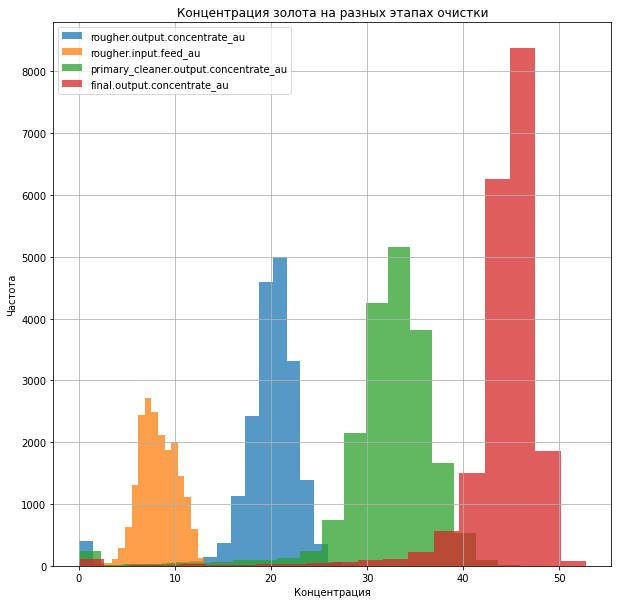

In [24]:
for concentration in au:
    full_df[concentration].hist(bins=20, alpha=0.75, figsize=(10,10), legend=True, grid=True)
plt.title('Концентрация золота на разных этапах очистки')
plt.ylabel('Частота')
plt.xlabel('Концентрация');

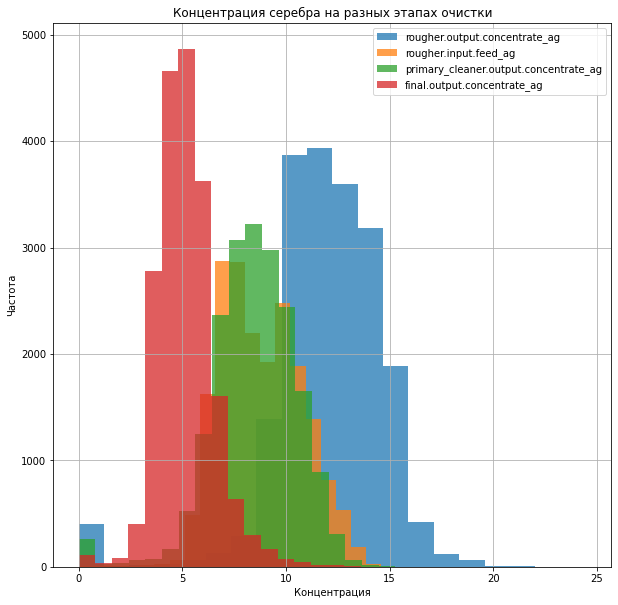

In [25]:
for concentration in ag:
    full_df[concentration].hist(bins=20, alpha=0.75, figsize=(10,10), legend=True, grid=True)
plt.title('Концентрация серебра на разных этапах очистки')
plt.ylabel('Частота')
plt.xlabel('Концентрация');

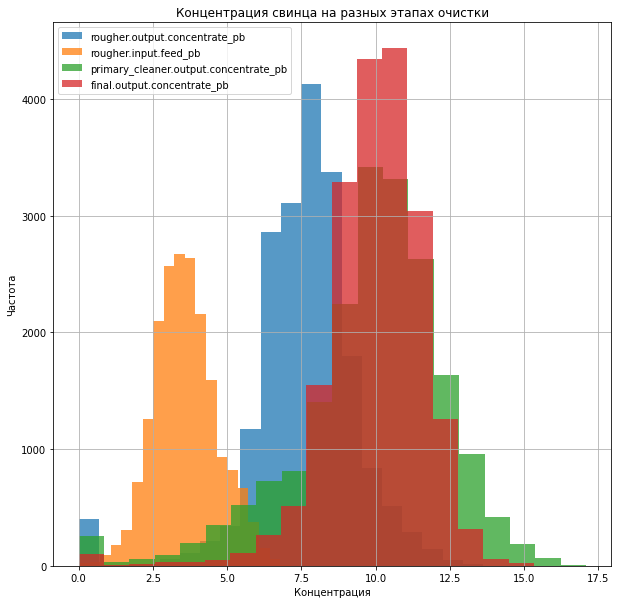

In [26]:
for concentration in pb:
    full_df[concentration].hist(bins=20, alpha=0.75, figsize=(10,10), legend=True, grid=True)
plt.title('Концентрация свинца на разных этапах очистки')
plt.ylabel('Частота')
plt.xlabel('Концентрация');

Концентрация золота и свинца растет с каждым этапом очистки, чего не скажешь о серебре - в финальной стадии его концентрация самая низкая, по сравнению с остальными этапами очистки. 

In [27]:
# Найдем столбцы, в которых указан размер гранул сырья - feed size
feed_size = []
for columns in test_df.columns:
    if 'feed_size' in columns:
        feed_size.append(columns)
feed_size

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

In [32]:
feed_size

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

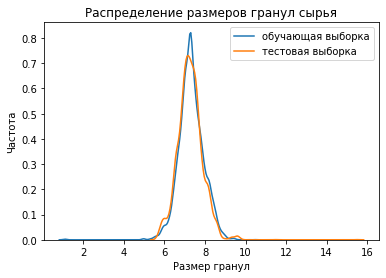

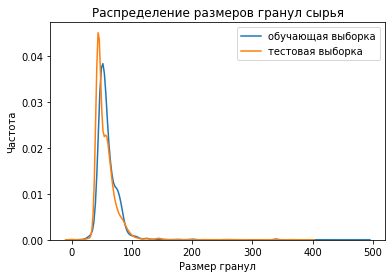

In [33]:
for stage in feed_size:
    sns.kdeplot(train_df[stage], label='обучающая выборка')
    sns.kdeplot(test_df[stage], label='тестовая выборка')
    plt.title('Распределение размеров гранул сырья')
    plt.xlabel('Размер гранул')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()

Как видим из графиков распределения размера гранул в обоих датасетах примерно одинаковы. 

In [35]:
# Просуммируем концентрацию на разных стадиях
sum_conc_rougher_in = pd.Series(full_df['rougher.input.feed_au'] + 
                             full_df['rougher.input.feed_sol'] + 
                             full_df['rougher.input.feed_pb'] + 
                             full_df['rougher.input.feed_ag'])
sum_conc_rougher_out = pd.Series(full_df['rougher.output.concentrate_au'] + 
                             full_df['rougher.output.concentrate_sol'] + 
                             full_df['rougher.output.concentrate_pb'] + 
                             full_df['rougher.output.concentrate_ag'])
sum_conc_final = pd.Series(full_df['final.output.concentrate_au'] + 
                             full_df['final.output.concentrate_sol'] + 
                             full_df['final.output.concentrate_pb'] + 
                             full_df['final.output.concentrate_ag'])


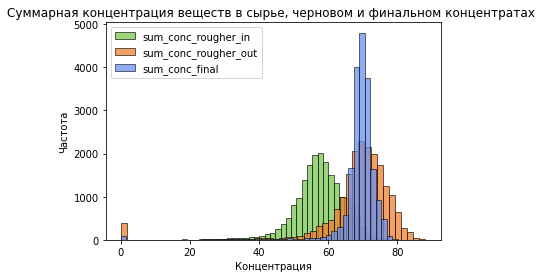

In [36]:
# Посмотрим распределение суммарных концентраций
colors = ['#78C850', '#F08030', '#6890F0']
#sns.set_palette("RdBu")
plt.figure()
for concentration, color in zip([sum_conc_rougher_in, sum_conc_rougher_out, sum_conc_final], colors):
    sns.histplot(concentration, bins=50, legend=True, color=color)
    plt.legend(['sum_conc_rougher_in', 'sum_conc_rougher_out', 'sum_conc_final'])
    plt.xlabel('Концентрация')
    plt.ylabel('Частота')
    plt.title('Суммарная концентрация веществ в сырье, черновом и финальном концентратах ');

Концентрация веществ в сырье наименьшая из всех, концентрация в финальном концентрате и черновом почти одинакова, но в финальном встречается чаще.

Нулевые значения кажутся банальным сбоем считывающего оборудования, и нам важно не учить модель на некорректных замерах - поэтому удаляем такие аномалии.

In [37]:
zero_emissions = ('rougher.input.feed_au', 'rougher.input.feed_sol', 
                  'rougher.input.feed_pb', 'rougher.input.feed_ag', 
                 'rougher.output.concentrate_au', 'rougher.output.concentrate_sol',
                 'rougher.output.concentrate_pb', 'rougher.output.concentrate_ag', 
                 'final.output.concentrate_au', 'final.output.concentrate_sol', 
                 'final.output.concentrate_pb', 'final.output.concentrate_ag')

In [38]:
for df in (train_df, test_df):
    for column_name in (zero_emissions):
        if column_name not in df.columns:
            continue
        df[column_name] = df[column_name].dropna(how='any', axis=0)
    

В этом блоке был проведен анализ данных:  
        1. Посмотрела на концентрацию разных Ме на разных этапах очистки  
        2. Посмотрела на размеры гранул сырья в датасетах train и test.   
        3. Посмотрела на суммарную концентрацию веществ на разных этапах, увидела нулевые выбросы и удалила их.   

## Модель

3.1. Напишите функцию для вычисления итоговой sMAPE.

In [39]:
# Функции для подсчета smape
def smape(target, prediction):
    smape = (1 / len(target)) * np.sum((np.abs(target - prediction)) / 
                                        ((np.abs(target) + np.abs(prediction)) / 2)) * 100
    return smape

In [40]:
def final_smape(rougher, final):
    final = (0.25 * rougher) + (0.75 * final)
    return final

In [41]:
# Подготовим датасеты
features_train_df = train_df.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
target_train_df_rougher = train_df['rougher.output.recovery']
target_train_df_final = train_df['final.output.recovery']

In [42]:
features_test_df = test_df.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
target_test_df_rougher = test_df['rougher.output.recovery']
target_test_df_final = test_df['final.output.recovery']

In [43]:
# Определим score для smape
score_smape = make_scorer(smape, greater_is_better=False)

In [45]:
# Модель дерева решений для smape
tree = DecisionTreeRegressor(random_state=STATE)
param_grid={'max_depth':range(1,9)}
grid_tree = GridSearchCV(tree, param_grid, verbose=10, cv=3, n_jobs=-1,
                          scoring=score_smape)
grid_tree_rougher = grid_tree.fit(features_train_df, target_train_df_rougher)
grid_tree_final = grid_tree.fit(features_train_df, target_train_df_final)
print(grid_tree_rougher.best_params_)
print(grid_tree_final.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START max_depth=1.................................................
[CV 1/3; 1/8] END ...............................max_depth=1; total time=   0.1s
[CV 2/3; 1/8] START max_depth=1.................................................
[CV 2/3; 1/8] END ...............................max_depth=1; total time=   0.1s
[CV 3/3; 1/8] START max_depth=1.................................................
[CV 3/3; 1/8] END ...............................max_depth=1; total time=   0.1s
[CV 1/3; 2/8] START max_depth=2.................................................
[CV 1/3; 2/8] END ...............................max_depth=2; total time=   0.1s
[CV 2/3; 2/8] START max_depth=2.................................................
[CV 2/3; 2/8] END ...............................max_depth=2; total time=   0.1s
[CV 3/3; 2/8] START max_depth=2.................................................
[CV 3/3; 2/8] END ...............................

In [48]:
param_grid={'max_depth':[2]}
grid_tree = GridSearchCV(tree, param_grid, verbose=10, cv=3, n_jobs=-1,
                          scoring=score_smape)
grid_tree_rougher = grid_tree.fit(features_train_df, target_train_df_rougher)
print(grid_tree_rougher.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START max_depth=2.................................................
[CV 1/3; 1/1] END ...............................max_depth=2; total time=   0.1s
[CV 2/3; 1/1] START max_depth=2.................................................
[CV 2/3; 1/1] END ...............................max_depth=2; total time=   0.1s
[CV 3/3; 1/1] START max_depth=2.................................................
[CV 3/3; 1/1] END ...............................max_depth=2; total time=   0.1s
-12.629621345641539


In [49]:
param_grid={'max_depth':[2]}
grid_tree = GridSearchCV(tree, param_grid, verbose=10, cv=3, n_jobs=-1,
                          scoring=score_smape)
grid_tree_final = grid_tree.fit(features_train_df, target_train_df_final)
print(grid_tree_final.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START max_depth=2.................................................
[CV 1/3; 1/1] END ...............................max_depth=2; total time=   0.1s
[CV 2/3; 1/1] START max_depth=2.................................................
[CV 2/3; 1/1] END ...............................max_depth=2; total time=   0.1s
[CV 3/3; 1/1] START max_depth=2.................................................
[CV 3/3; 1/1] END ...............................max_depth=2; total time=   0.1s
-10.79793639337045


In [50]:
scores_rougher = -1*grid_tree_rougher.best_score_
score_final = -1*grid_tree_final.best_score_

In [51]:
smape_tree = final_smape(scores_rougher, score_final)
smape_tree

11.255857631438223

In [53]:
# Модель случайного леса для smape
forest = RandomForestRegressor(random_state=STATE)
param_grid={'n_estimators':range(1, 50, 10), 'max_depth':range(1,9)}
grid_forest = GridSearchCV(forest, param_grid, verbose=10, cv=3, n_jobs=-1,
                          scoring=score_smape)
grid_forest_rougher = grid_forest.fit(features_train_df, target_train_df_rougher)
grid_forest_final = grid_forest.fit(features_train_df, target_train_df_final)
print(grid_forest_rougher.best_params_)
print(grid_forest_final.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV 1/3; 1/40] START max_depth=1, n_estimators=1................................
[CV 1/3; 1/40] END ..............max_depth=1, n_estimators=1; total time=   0.0s
[CV 2/3; 1/40] START max_depth=1, n_estimators=1................................
[CV 2/3; 1/40] END ..............max_depth=1, n_estimators=1; total time=   0.0s
[CV 3/3; 1/40] START max_depth=1, n_estimators=1................................
[CV 3/3; 1/40] END ..............max_depth=1, n_estimators=1; total time=   0.0s
[CV 1/3; 2/40] START max_depth=1, n_estimators=11...............................
[CV 1/3; 2/40] END .............max_depth=1, n_estimators=11; total time=   0.4s
[CV 2/3; 2/40] START max_depth=1, n_estimators=11...............................
[CV 2/3; 2/40] END .............max_depth=1, n_estimators=11; total time=   0.3s
[CV 3/3; 2/40] START max_depth=1, n_estimators=11...............................
[CV 3/3; 2/40] END .............max_depth=1, n_

In [56]:
param_grid={'n_estimators':[41], 'max_depth':[2]}
grid_forest = GridSearchCV(forest, param_grid, verbose=10, cv=3, n_jobs=-1,
                          scoring=score_smape)
grid_forest_rougher = grid_forest.fit(features_train_df, target_train_df_rougher)
print(grid_forest_rougher.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START max_depth=2, n_estimators=41................................
[CV 1/3; 1/1] END ..............max_depth=2, n_estimators=41; total time=   2.5s
[CV 2/3; 1/1] START max_depth=2, n_estimators=41................................
[CV 2/3; 1/1] END ..............max_depth=2, n_estimators=41; total time=   2.4s
[CV 3/3; 1/1] START max_depth=2, n_estimators=41................................
[CV 3/3; 1/1] END ..............max_depth=2, n_estimators=41; total time=   2.5s
-12.508966508964308


In [57]:
param_grid={'n_estimators':[41], 'max_depth':[2]}
grid_forest = GridSearchCV(forest, param_grid, verbose=10, cv=3, n_jobs=-1,
                          scoring=score_smape)
grid_forest_rougher = grid_forest.fit(features_train_df, target_train_df_final)
print(grid_forest_final.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START max_depth=2, n_estimators=41................................
[CV 1/3; 1/1] END ..............max_depth=2, n_estimators=41; total time=   2.5s
[CV 2/3; 1/1] START max_depth=2, n_estimators=41................................
[CV 2/3; 1/1] END ..............max_depth=2, n_estimators=41; total time=   2.5s
[CV 3/3; 1/1] START max_depth=2, n_estimators=41................................
[CV 3/3; 1/1] END ..............max_depth=2, n_estimators=41; total time=   2.5s
-10.80139837932292


In [58]:
scores_rougher = -1*grid_forest_rougher.best_score_
score_final = -1*grid_forest_final.best_score_

In [59]:
smape_forest = final_smape(scores_rougher, score_final)
smape_forest

10.80139837932292

In [61]:
# Модель линейной регрессии для smape
lin_regr = LinearRegression()
score_lin_rougher = cross_val_score(lin_regr,  features_train_df, target_train_df_rougher, verbose=10, 
                                   cv=KFold(3, shuffle=True, random_state=STATE),
                                   n_jobs=-1, scoring=score_smape)
score_lin_final = cross_val_score(lin_regr,  features_train_df, target_train_df_final, verbose=10,
                                 cv=KFold(3, shuffle=True, random_state=STATE),
                                   n_jobs=-1, scoring=score_smape)
score_lin_rougher = -1*score_lin_rougher.mean()
score_lin_final = -1*score_lin_final.mean()
print(score_lin_rougher)
print(score_lin_final)

[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-10.463) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ............................... score: (test=-9.670) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] END .............................. score: (test=-10.292) total time=   0.2s
[CV] START .....................................................................
[CV] END ............................... score: (test=-8.730) total time=   0.3s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ............................... score: (test=-9.308) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.137) total time=   0.2s
10.141644140395952
9.058298432079097


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished


In [62]:
smape_lin = final_smape(score_lin_rougher, score_lin_final)
smape_lin

9.32913485915831

In [66]:
# Проверка модели на тестовой выборке
lin_test = LinearRegression()
lin_test.fit(features_train_df, target_train_df_rougher)
lin_test_predict = lin_test.predict(features_test_df)
smape_test_rougher = smape(lin_test_predict, target_test_df_rougher)

In [67]:
lin_test = LinearRegression()
lin_test.fit(features_train_df, target_train_df_final)
lin_test_predict = lin_test.predict(features_test_df)
smape_test_final = smape(lin_test_predict, target_test_df_final)

In [68]:
smape_lin = final_smape(smape_test_rougher, smape_test_final)
smape_lin

9.972775555351229

На тестовой выборке smape получился повыше, но не намного.

In [69]:
# Проверим модель на адекватность
def dummy(strategy, train, target, features_test, target_test):
    dummy_reg = DummyRegressor(strategy=strategy)
    dummy_reg.fit(train, target)
    dummy_reg.predict(features_test)
    return smape(dummy_reg.predict(features_test), target_test)

In [70]:
dummy_rougher = dummy('mean', features_train_df, target_train_df_rougher, 
                      features_test_df, target_test_df_rougher)
dummy_final = dummy('mean', features_train_df, target_train_df_final, 
                      features_test_df, target_test_df_final)

In [71]:
smape_dummy = final_smape(dummy_rougher, dummy_final)
smape_dummy

10.289630376021035

Получается, что наша модель получилась ощутимо лучше, чем константная модель.

## Выводы
1. Открыла и изучила датасеты. Полный датасет full был разбит на 2 датасета - train и test. 
2. Заменила все пропуски в датасетах train и test методом ffil, который работает на основании заполненных ранее данных. 
3. Добавила в датасеты train и test целевые признаки из full
4. Также посмотрела на корреляцию, увидела, что между некоторыми данными есть довольно сильная корреляция, но решила ничего не делать с этим, так как далее в проекте использую линейные методы для обучения моделей. К тому же, непонятно, что будет если удалить большое количество данных из-за корреляции, возможно это будет критично. 
5. Далее перешла к анализу данных. Посмотрела на концентрации продуктов на разных этапах обработки. Самый главный продукт - золото. Его концентрация растет от этапа к этапу. 
6. Далее посмотрела распределение размеров гранул сырья для train и test. Различий не увидела.
7. Также посмотрела на суммарную концентрацию веществ на различных этапах обработки. На этапе сырья концентрация веществ ние, чем на промежуточном и финальном этапах. 
8. Написала функцию для вычисления основной метрики качества по этому проекту - SMAPE. Обучила разные модели. Лучшие результаты оказались у модели линейной регрессии, чуть более худшие результаты показал случайный лес, далее идет дерево решений. Проверила работу модели линейной регрессии на тестовой выборке  - всё вполне адекватно, и попыталась посмотреть на адекватность на дамми-регрессоре. Моя модель оказалась лучше константной модели. 